In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from net import Net
from dataset import Dataset
%matplotlib inline

In [2]:
image_size = 128
batch_size = 64
ckpt_path = "./checkpoint/flower_30.pth"
data_root = "./data"

In [3]:
data = Dataset(train=False,
               data_root=data_root,
               size=image_size)
loader = DataLoader(data,
                    batch_size=batch_size,
                    num_workers=1,
                    shuffle=True)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Net().to(device)

# load pre-trained model
state_dict = torch.load(ckpt_path)
net.load_state_dict(state_dict)

In [5]:
net.eval()
with torch.no_grad():
    for inputs in loader:
        images = inputs[0].to(device)
        labels = inputs[1].to(device)

        outputs = net(images)
        _, preds = torch.max(outputs.detach(), 1)

        break # run only first batch

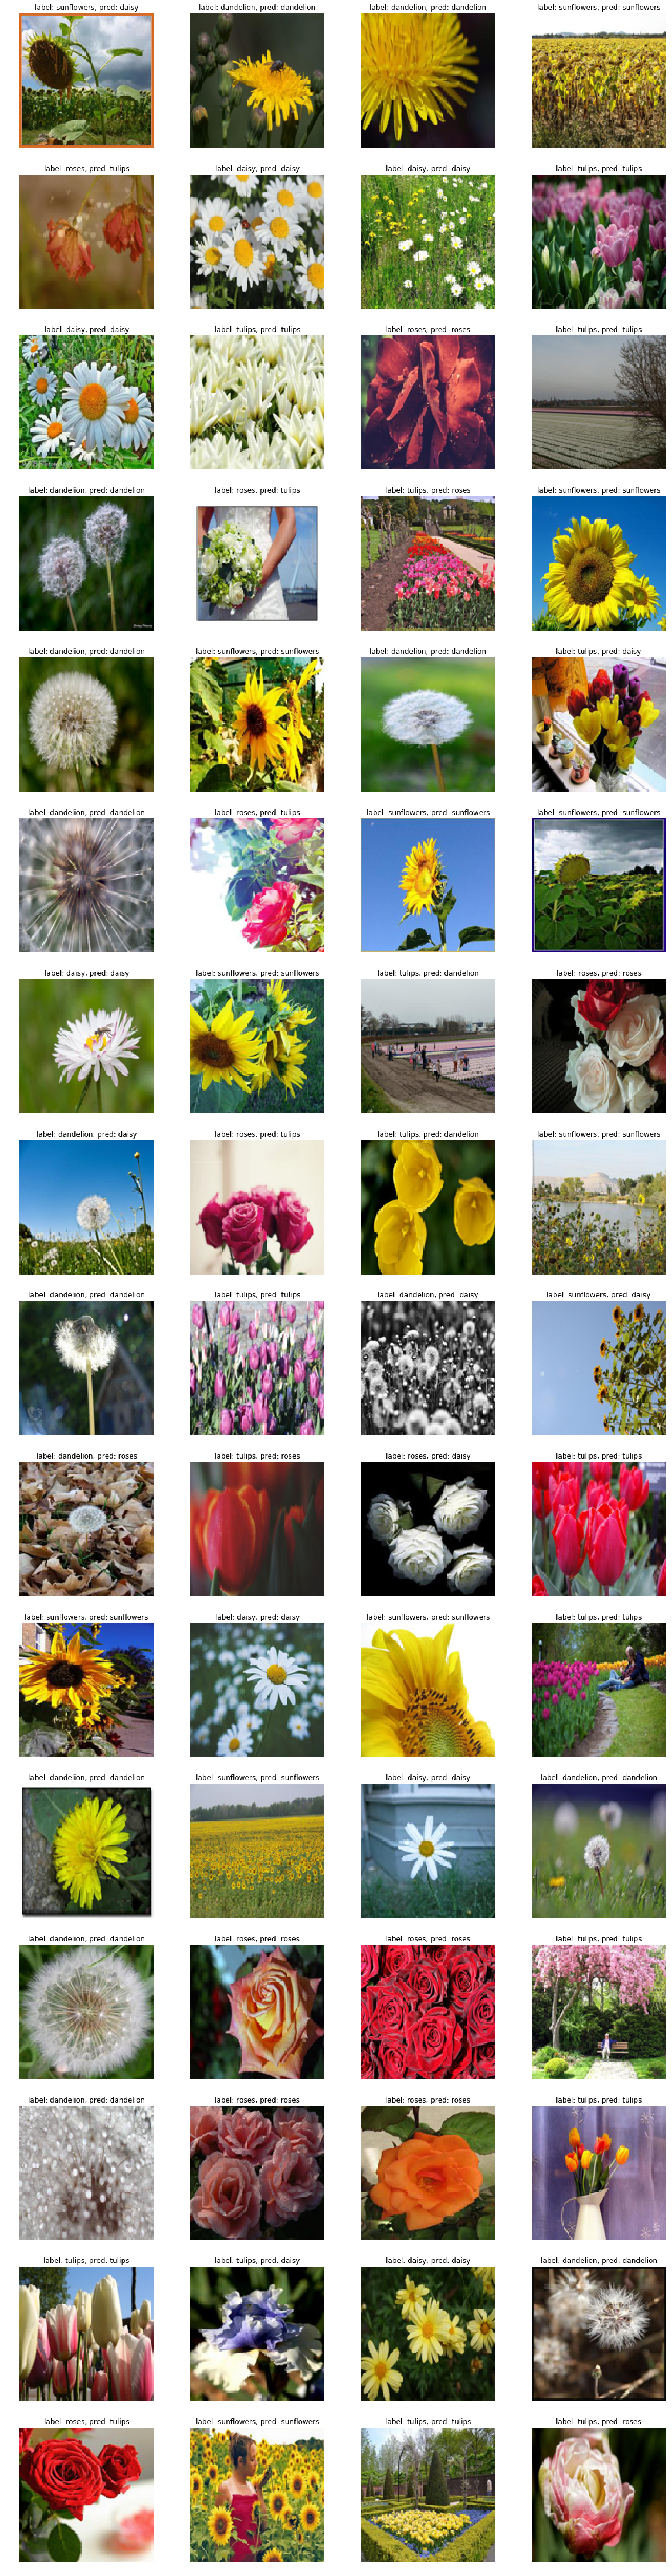

In [6]:
fig = plt.figure(figsize=(20, 80))

# visualize first batch
for i in range(batch_size):
    image = images[i].mul(255).clamp(0, 255).byte().permute(1, 2, 0).cpu().numpy()
    
    label = int(labels[i].cpu().numpy())
    pred  = int(preds[i].cpu().numpy())
    
    label = Dataset.label2str[label]
    pred  = Dataset.label2str[pred]
    
    ax = fig.add_subplot(16, 4, i+1)
    ax.set_title("label: {}, pred: {}".format(label, pred))
    ax.imshow(image)
    ax.axis("off")